In [2]:
"""
Marc Katz
Financial Systems
CSCI 499
"""
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
"""
File: string of file name
      must be in csv format with a .txt extension
returns pandas DataFrame of the given file
"""
def get_data(file):
    return pd.read_csv(file, header=0)

"""
data: pandas DataFrame
Normalizes the values in data with the formula:
x = (x - avg) / std
"""
def normalize(data):
    for col in data.columns:
        avg = data.loc[:, col].mean()
        stdev = data.loc[:, col].std()
        data.loc[:, col] = (data.loc[:, col] - avg) / stdev


In [4]:
"""
features: array-like of numeric values
coefficients: array-like of numeric values
features and coefficients must be of the same size
returns an array where each i = features[i]*coefficients[i]
"""
def prediction(features, coefficients):
    return coefficients*features

"""
features: array-like of numeric values
targets: array-like of numeric values
coefficients: array-like of numeric values
Returns the sum of squares cost function for a given predictive regression model
    sum( (y* - y)^2 / 2*n )
"""
def cost_function(features, targets, coefficients):
    guesses = np.sum(prediction(features, coefficients), axis = 1)
    sum_of_sq = sum( (guesses - targets.loc[:, targets.columns[0]]) ** 2) / (2 * len(features))
    return sum_of_sq

"""
features: array-like of numeric values
targets: array-like of numeric values
coefficients: array-like of numeric values
alpha: numeric value
One iteration of a gradient decent model
alpha is the learning rate
returns tuple of cost function of new model, and coefficients of new model
"""
def gradient_descent(features, targets, coefficients, alpha):
    guesses = np.sum(prediction(features, coefficients), axis = 1)
    for col in range(len(features.columns)):
        coefficients[col] -= alpha * sum((guesses - targets.loc[:, targets.columns[0]]) * features.iloc[:,col]) / len(features)
    cost = cost_function(features, targets, coefficients)
    return cost, coefficients

"""
features: array-like of numeric values
targets: array-like of numeric values
coefficients: array-like of numeric values
alpha: numeric value
iters: numeric value
Full linear regression algorithm
iterates over learning model iters times
returns list of all costs, the final cost, and the final coefficients
"""
def run_gradient_descent(features, targets, coefficients, alpha, iters):
    costs = []
    for i in range(iters):
        cost, coefficients = gradient_descent(features, targets, coefficients, alpha)
        costs.append(cost)
    return costs, cost, coefficients

In [5]:
"""
value: array-like of numeric values
observed: array-like of numeric values
bandwidth: numeric value
Returns gaussian form of the kernal function:
e^( -0.5 * ((x_i - x) / h) ^ 2 )
"""
def gaussian_kernel(value, observed, bandwidth):
    return math.e ** (((np.linalg.norm(observed - value) / bandwidth) ** 2) / -2)

"""
value: array-like of numeric values
observed: array-like of numeric values
bandwidth: numeric value
inputs: array-like of numeric values
Iterates through the input array, using gaussian kernels from the learning set to predict the value
Returns array of predictions
"""
def kernel_regression(features, targets, bandwidth, inputs):
    predictions = []
    for value in inputs.index:
        gauss_kernels = np.array([gaussian_kernel(value, observed, bandwidth) for observed in features.index])
        w = np.array([len(features) * (k / np.sum(gauss_kernels)) for k in gauss_kernels])
        predictions.append((np.dot(w.T, targets) / len(features))[0])
    return predictions

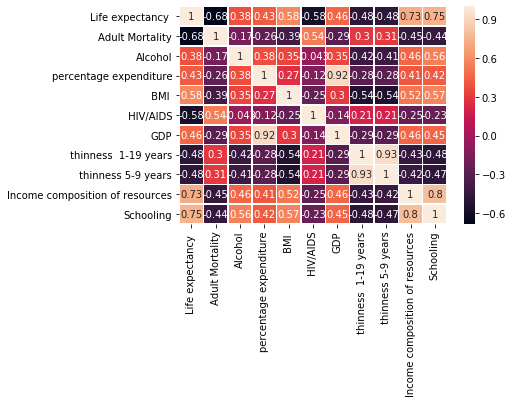

In [6]:
#Data source: https://www.kaggle.com/kumarajarshi/life-expectancy-who
filename = r"C:\Users\marc's laptop\Documents\College\spring 2021\CSCI499\Life_Expectancy_Data2.txt"
#data_headers = ["Life expectancy ","Adult Mortality","infant deaths","Alcohol","percentage expenditure","Hepatitis B","Measles "," BMI ","under-five deaths ","Polio","Total expenditure","Diphtheria "," HIV/AIDS","GDP","Population"," thinness  1-19 years"," thinness 5-9 years","Income composition of resources","Schooling"]
#feature_headers = ["Adult Mortality","infant deaths","Alcohol","percentage expenditure","Hepatitis B","Measles "," BMI ","under-five deaths ","Polio","Total expenditure","Diphtheria "," HIV/AIDS","GDP","Population"," thinness  1-19 years"," thinness 5-9 years","Income composition of resources","Schooling"]
#Removed headers with a Pearson's correlation coefficient with an absolute value below 0.4
data_headers = ["Life expectancy ","Adult Mortality","Alcohol","percentage expenditure"," BMI "," HIV/AIDS","GDP"," thinness  1-19 years"," thinness 5-9 years","Income composition of resources","Schooling"]
feature_headers = ["Adult Mortality","Alcohol","percentage expenditure"," BMI "," HIV/AIDS","GDP"," thinness  1-19 years"," thinness 5-9 years","Income composition of resources","Schooling"]
target_header = ["Life expectancy "]

data = get_data(filename)
#filter out unwanted columns
data = data.loc[:, data_headers]
#remove rows with blank values
data = data.dropna()
#ensure everything is numeric
data.astype("float32")
#sort values by the target
#unneeded for algorithms, but makes visualization easier
data = data.sort_values(by=target_header[0])
  
#split the data into a train set and a testing set
training_data = data.sample(frac=0.5)
test_data = data.drop(training_data.index)

#display heatmap of Pearson's Correlation Coefficient
sns.heatmap(data.corr(), annot=True, linewidth=0.5)
plt.show()

Cost: 8.779814163378358
Bias: 69.1176277581747
Adult Mortality: -2.131154151941869
Alcohol: -0.2377811862627318
percentage expenditure: 0.36197886449852623
 BMI : 0.8418005222372268
 HIV/AIDS: -2.638284526383791
GDP: 0.4677680815560496
 thinness  1-19 years: -0.5381932324682385
 thinness 5-9 years: -0.1827087214430401
Income composition of resources: 2.6805882768745604
Schooling: 2.520009593932454


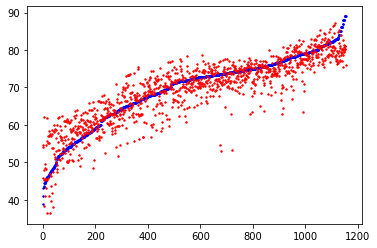

Linear Regression: 
R^2: 0.7999862322460112
Adjusted R^2: 0.7978845113939552


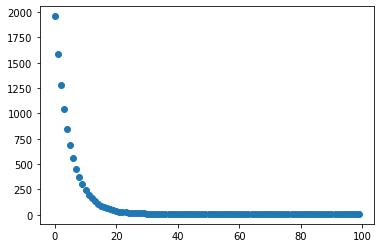

In [7]:
#get feature data
feature_data = training_data.loc[:,feature_headers]
    
#get target data
target_data = training_data.loc[:,target_header]

#normalize feature data so it is from -1 to 1
normalize(feature_data)
#add bias term column
feature_data = pd.concat([pd.Series(1, index=feature_data.index, name="Bias"), feature_data], axis=1)
    
#initial coefficients
#set to 0
coefficients = np.array([0.0] * len(feature_data.columns))

#learning rate
alpha = 0.10
#number of iterations
iters = 100

#Run linear regression algorithm
costs, cost, coefficients = run_gradient_descent(feature_data, target_data, coefficients, alpha, iters)

#print final costs and weights
print("Cost: " + str(cost))
for c in range(len(coefficients)):
    print(feature_data.columns[c] + ": " + str(coefficients[c]))
    
#get feature test data
feature_test_data = test_data.loc[:,feature_headers]
#get target test data
target_test_data = test_data.loc[:,target_header]

#normalize feature data so it is from -1 to 1
normalize(feature_test_data)
#add bias term column
feature_test_data = pd.concat([pd.Series(1, index=feature_test_data.index, name="Bias"), feature_test_data], axis=1)

#get array of predicted target values based on final weights
final_prediction = np.sum(prediction(feature_test_data, coefficients), axis = 1)

#plot predicted values against expected values
plt.figure()
plt.scatter(x=list(range(0, len(target_test_data))),y= target_test_data, color='blue', s=2)
plt.scatter(x=list(range(0, len(target_test_data))), y=final_prediction, color='red', s=2)
plt.show()

#calculate R^2 and Adjusted R^2 to evaluate model
Rss = sum( (final_prediction - target_test_data.loc[:, target_test_data.columns[0]]) ** 2) 
target_avg = target_test_data.loc[:, target_test_data.columns[0]].mean()
Tss = sum( (target_avg - target_test_data.loc[:, target_test_data.columns[0]]) ** 2) 

Rsq = 1 - Rss/Tss
print("Linear Regression: ")
print("R^2: " + str(Rsq))

RsqAdj = 1 - ((1 - Rsq) * (len(target_test_data) - 1)) / (len(target_test_data) - len(feature_test_data.columns) - 2)
print("Adjusted R^2: " + str(RsqAdj))

#plot graph of costs as learning model progressed
plt.figure()
plt.scatter(x=list(range(0, iters)), y=costs)
plt.show()


Kernel Regression: 
R^2: 0.8880245448610596
R^2 Adjusted: 0.8868479201135402


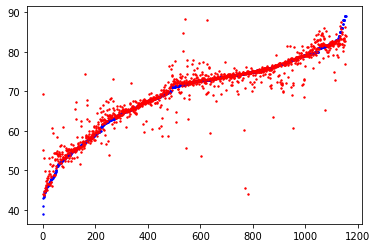

In [8]:
#Kernel Regression
kernel_predictions = kernel_regression(feature_data, target_data, 2, feature_test_data)

#calculate R^2 and Adjusted R^2 to evaluate model
Rss = sum( (kernel_predictions - target_test_data.loc[:, target_test_data.columns[0]]) ** 2) 
target_avg = target_test_data.loc[:, target_test_data.columns[0]].mean()
Tss = sum( (target_avg - target_test_data.loc[:, target_test_data.columns[0]]) ** 2) 

Rsq = 1 - Rss/Tss
print("Kernel Regression: ")
print("R^2: " + str(Rsq))

RsqAdj = 1 - ((1 - Rsq) * (len(target_test_data) - 1)) / (len(target_test_data) - len(feature_test_data.columns) - 2)
print("R^2 Adjusted: " + str(RsqAdj))

#plot predicted values against expected values
plt.figure()
plt.scatter(x=list(range(0, len(target_test_data))),y=target_test_data, color='blue', s=2)         
plt.scatter(x=list(range(0, len(target_test_data))), y=kernel_predictions, color='red', s=2)
plt.show()